## Study the changes when modifying geometry dimensions

In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import geo_studies, rat_misc

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

In [3]:
ratreader = None

In [4]:
def recastEndVolumes(data):
    # Replace
    for i in range(len(data['end_volume'])):
        if 'ropes' in data['end_volume'][i]:
            data['end_volume'][i] = 'snorope'
    for i in range(len(data['end_volume'])):
        if 'anchors' in data['end_volume'][i]:
            data['end_volume'][i] = 'snoav'
    
    data['end_volume'][data['end_volume'] == 'neck'] = 'snoav'
    data['end_volume'][data['end_volume'] == 'av']   = 'snoav'
    data['end_volume'][data['end_volume'] == 'inner_av'] = 'snosv'
    
    data['end_volume'][data['end_volume'] == 'NULL'] = 'snorope'
    
    # Place everything outside the PSUP radius to the cavity
    psup_radius = 8390.
    data['end_volume'][data['end_r'] > psup_radius] = 'cavity'
    
    return data

In [5]:
def ropeShadow(data):
    print 'Rope shadow'
    # All zenith angles
    a = dict(collections.Counter(data['end_volume']).items())
    total = len(data['end_volume'])
    outav = total - a['snoav'] - a['snosv']
    print 'Global shadowing', a['snorope']*1./outav
    
    # Only upper half
    mybool = data['costheta_dir']>0
    a = dict(collections.Counter(data['end_volume'][mybool]).items())
    total = len(data['end_volume'][mybool])
    outav = total - a['snoav'] - a['snosv']
    print 'Upper hemisphere shadowing', a['snorope']*1./outav    
    
    # Only lower half
    mybool = data['costheta_dir']<0
    a = dict(collections.Counter(data['end_volume'][mybool]).items())
    total = len(data['end_volume'][mybool])
    outav = total - a['snoav'] - a['snosv']
    print 'Lower hemisphere shadowing', a['snorope']*1./outav   

### This is the original snoplus geometry removing items NOT in native geometry<br>Ropes have been made thinner to match

In [6]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_rewrite/'
infile_dir += 'before_db'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
reference = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
reference = recastEndVolumes(reference)
ropeShadow(reference)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0238527031658
Upper hemisphere shadowing 0.0333195271424
Lower hemisphere shadowing 0.0144014875567


In [8]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_rewrite/'
infile_dir += 'before_db'
infile_name = 'pbomb500.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
reference500 = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
reference500 = recastEndVolumes(reference500)
ropeShadow(reference500)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0218832714381
Upper hemisphere shadowing 0.0310239172013
Lower hemisphere shadowing 0.0127299591753


In [9]:
reload(geo_studies)

<module 'geo_studies' from '/home/jp/projects/snoplus/python_modules/geo_studies.pyc'>

Bin stats 31.415 8.03535572745


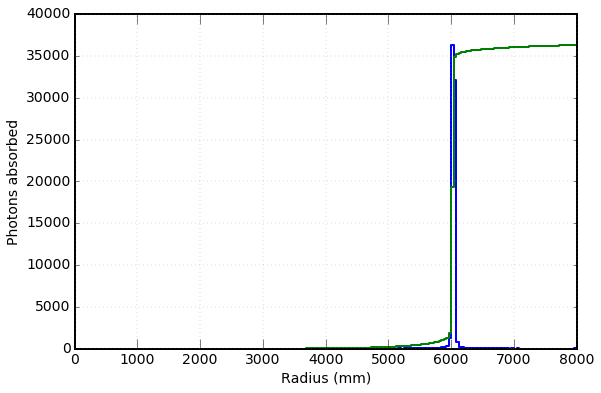

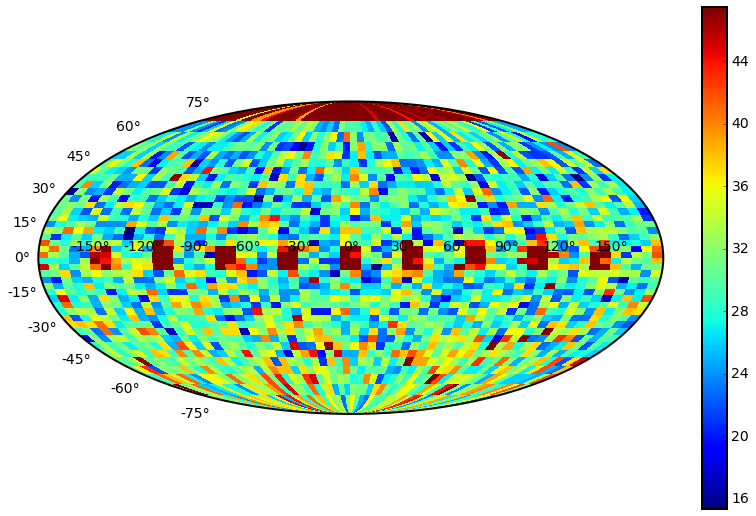

In [10]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snoav')

Bin stats 29.5166666667 6.91355351626


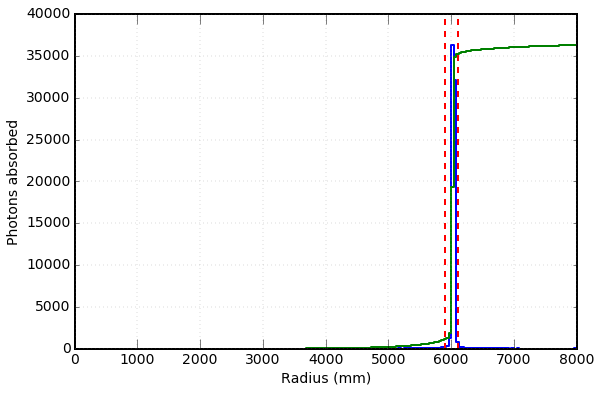

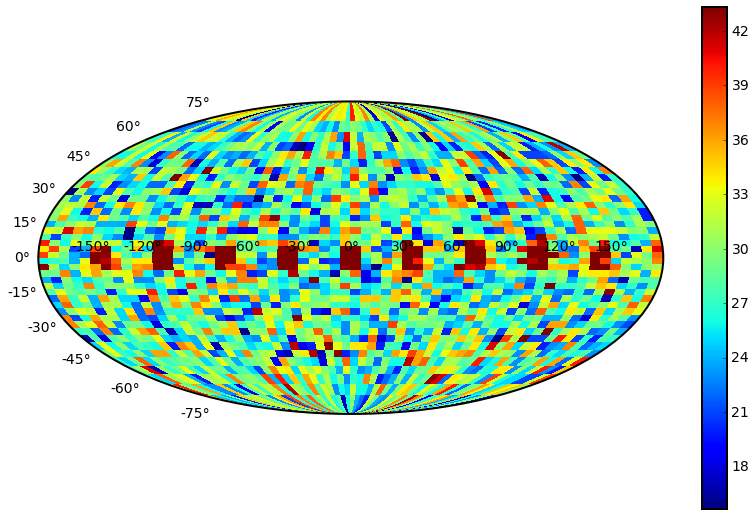

In [12]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snoav', radius_range = [5900., 6100.])

Bin stats 17.91375 5.22147593478


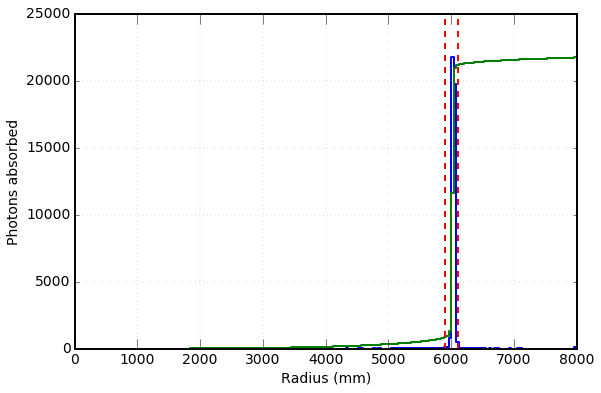

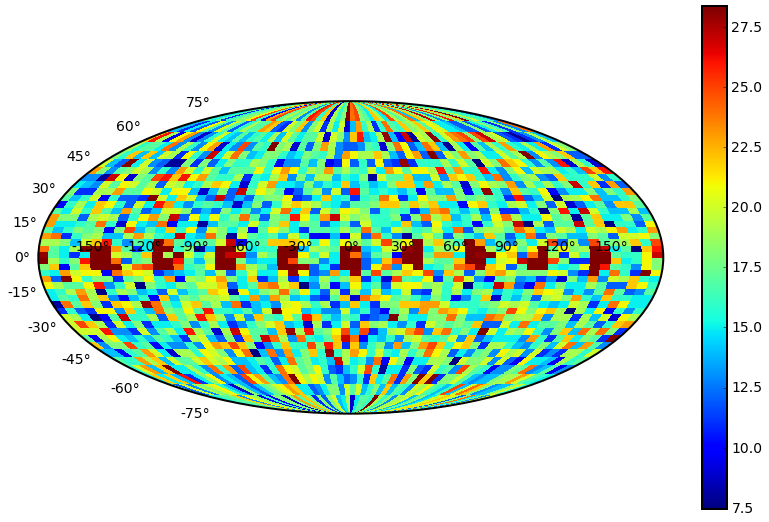

In [13]:
dummy = geo_studies.volumeAnalysis(data=reference500, volume='snoav', radius_range = [5900., 6100.])

Bin stats 6.24501108647 9.87498646045


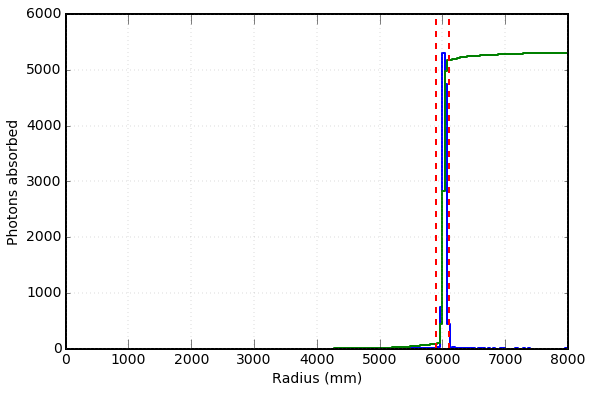

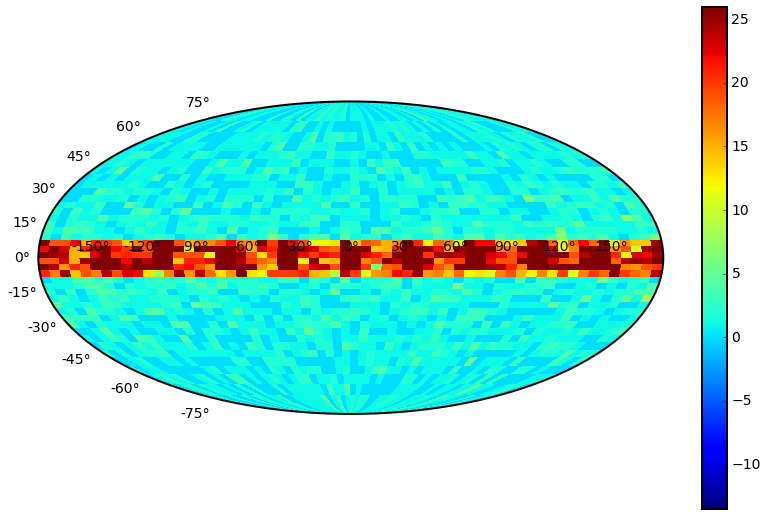

In [14]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snoav', radius_range = [5900., 6100.],
                          extra_conditions = {'costheta_dir':np.array([-.14, .14])})

Bin stats 3.94671201814 6.89938176803


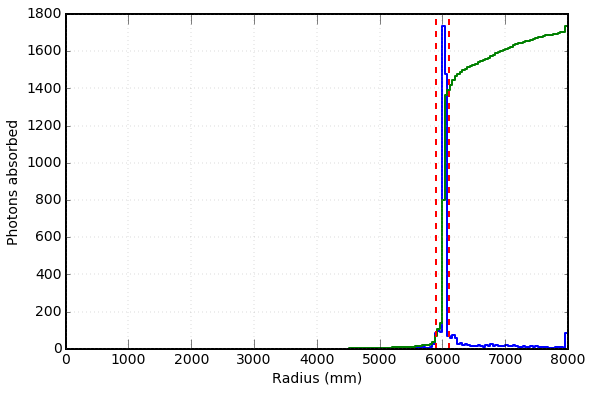

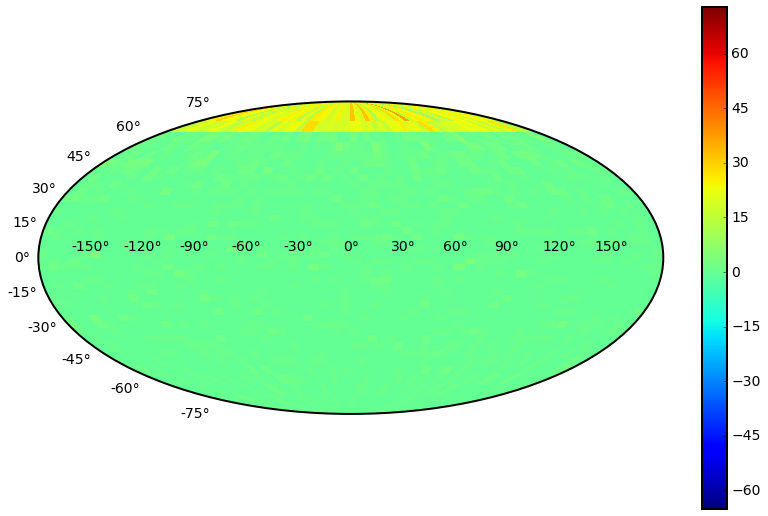

In [15]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snoav', radius_range = [5900., 6100.], plot_nstd=10.,
                          extra_conditions = {'costheta_dir':np.array([0.9, 1.])})

Bin stats 16.1589285714 8.83730479246


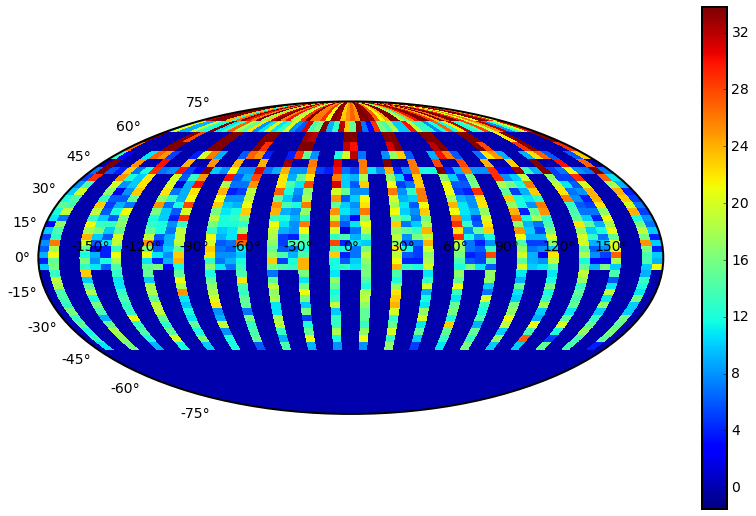

In [16]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snorope', radius_plot=False)

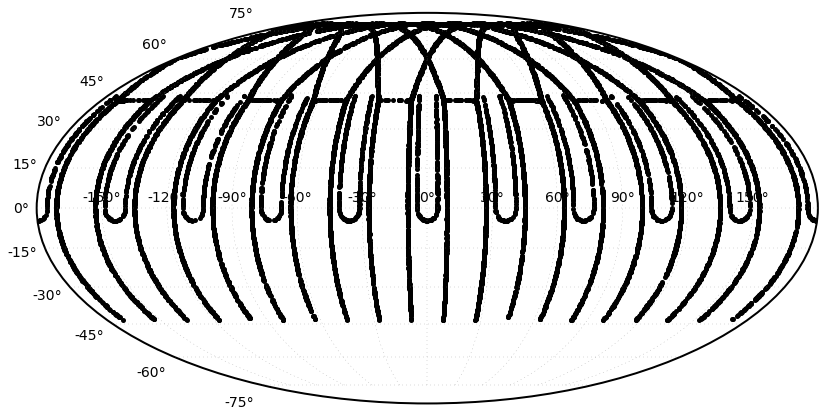

In [17]:
dummy = geo_studies.volumeAnalysis(data=reference, volume='snorope', plot_mode = 'scatter', radius_plot=False)

### Native geometry with larger av, to match size in std geo

In [42]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_rewrite/'
infile_dir += 'using_db'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
native = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
native = recastEndVolumes(native)
ropeShadow(native)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0242756646249
Upper hemisphere shadowing 0.0344989687019
Lower hemisphere shadowing 0.0140890287675


In [46]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_rewrite/'
infile_dir += 'using_db'
infile_name = 'pbomb380.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
native = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
native = recastEndVolumes(native)
ropeShadow(native)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0245204372141
Upper hemisphere shadowing 0.0343761641686
Lower hemisphere shadowing 0.014700230086


In [19]:
# Opening the file
infile_dir = '/home/jp/projects/snoplus/rundir/nativegeo_rewrite/'
infile_dir += 'using_db'
infile_name = 'pbomb500.root'
ratreader = rat_misc.openRat(infile_dir, infile_name, ratreader)
native500 = geo_studies.doRead(ratreader=ratreader, max_photons = 10000000)
native500 = recastEndVolumes(native500)
ropeShadow(native500)

No ratreader file. Opening it for the first time
Rope shadow
Global shadowing 0.0223281503938
Upper hemisphere shadowing 0.0316961748354
Lower hemisphere shadowing 0.0129821128229


In [30]:
outdir = '/home/jp/projects/snoplus/reports/nativegeometry/newfigs/380nm'

[ 0.99879834  1.0093241   1.0274616   1.00334445]
[ 1.00543123  1.00028525  1.00048365  0.9956875   0.9993128   1.01801093
  1.00379711  1.01309285  0.99907749  1.0040032   1.02308802  0.97069272
  1.0890411   0.96385542  0.89141414  1.06552707]


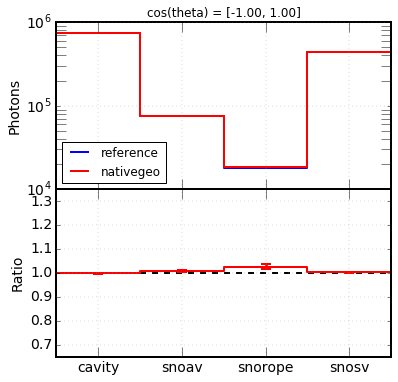

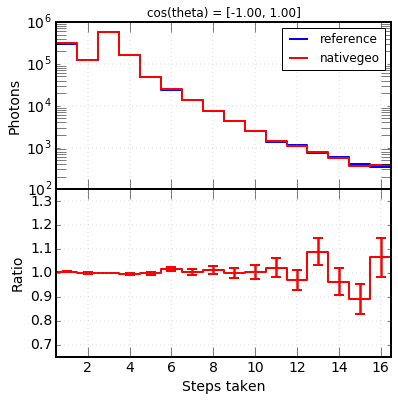

In [47]:
reload(geo_studies)
geo_studies.compareTracking(set_list = [reference, native],
                           pltlabels=['reference','nativegeo'],
                           outdir=outdir)

[ 1.00251683  0.9671096   1.12921348  1.00417953]
[ 1.0036125   0.9952086   1.00103531  1.00805153  0.97939866  0.97905182
  0.99258893  1.02962963  1.09724473  0.86821705  0.92195122  1.2027027
  1.26732673  1.3         1.28571429  1.33333333]
[ 0.99724706  0.9521477   1.03059388  1.01089773]
[ 1.0075091   0.99662595  0.99874286  0.99839716  0.97915189  0.96516165
  0.95500726  1.05962854  1.11219512  1.12359551  1.17318436  0.85882353
  0.87878788  0.98684211  0.85507246  1.35897436]
[ 1.00561793  0.99079225  1.01540832  1.01145247]
[ 1.01083305  1.00774336  1.00708886  0.99628003  0.99842158  0.99184149
  1.04407295  1.02566453  1.04857621  1.16568047  0.94366197  0.96385542
  1.09345794  0.88607595  0.91071429  1.04081633]
[ 0.99634453  1.01701844  0.99740067  1.00181261]
[ 1.00536579  1.00673891  1.00310647  0.97300377  0.97850208  1.01551068
  1.05012788  1.00460829  0.88485804  0.99463807  1.22959184  0.86857143
  1.09375     1.1875      0.87931034  1.11363636]
[ 0.99328808  1.0

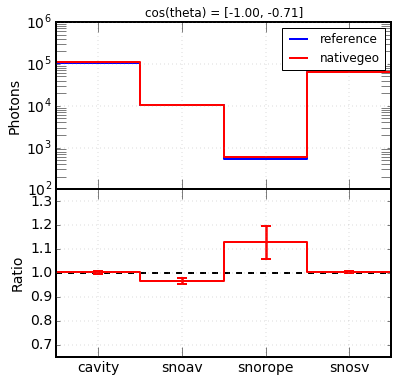

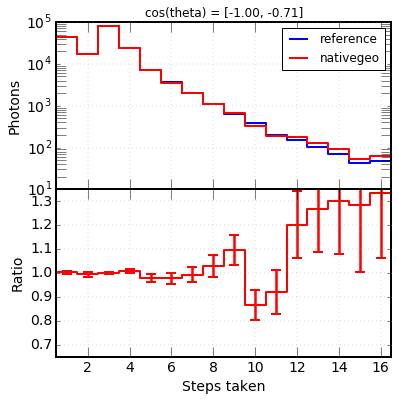

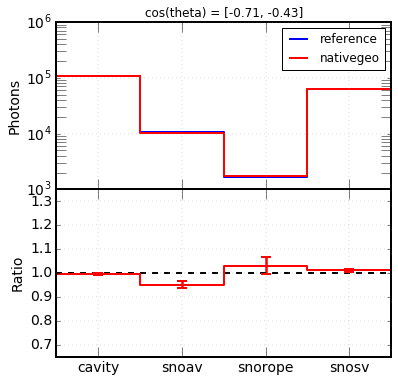

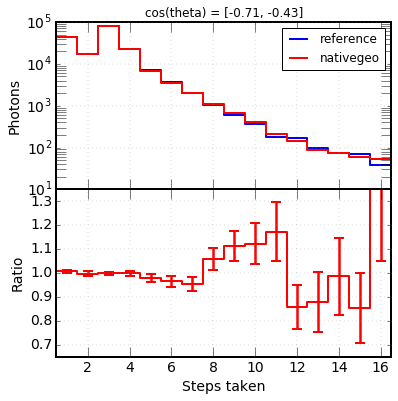

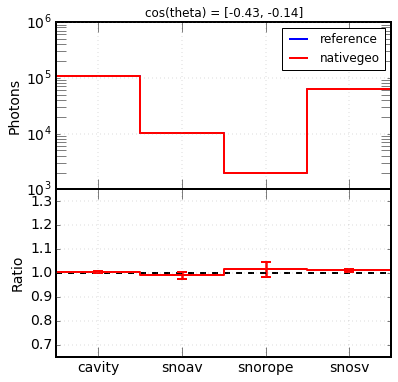

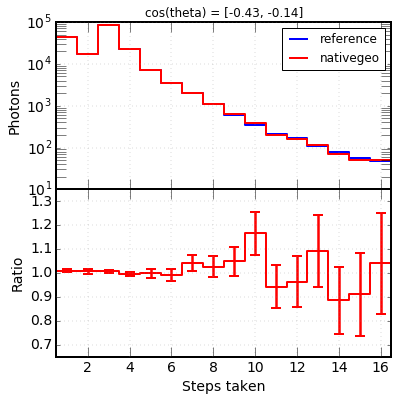

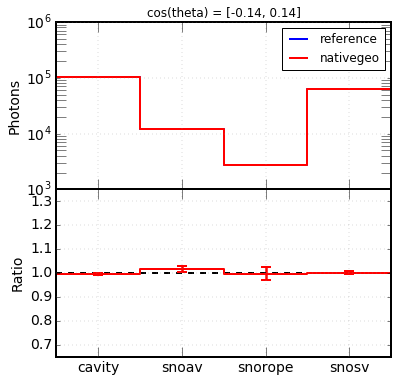

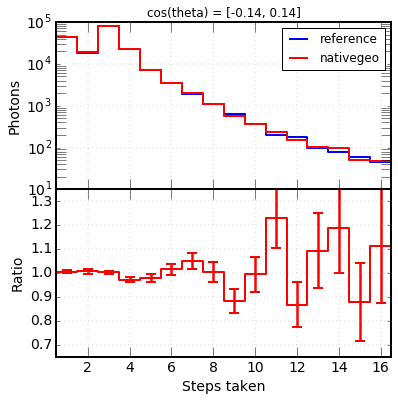

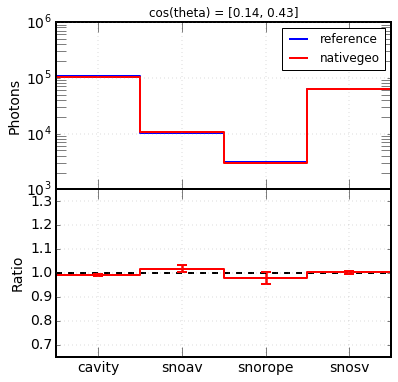

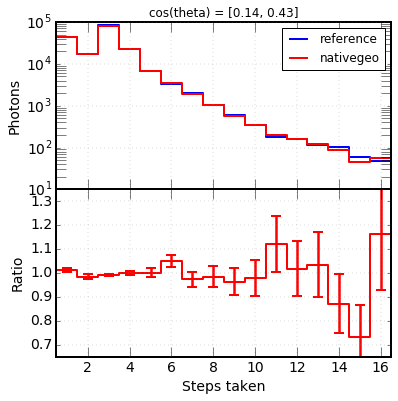

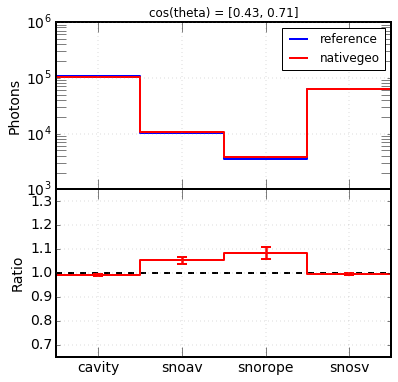

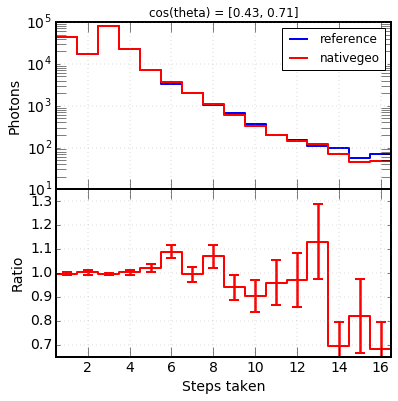

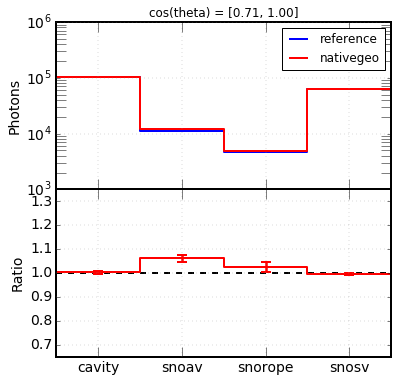

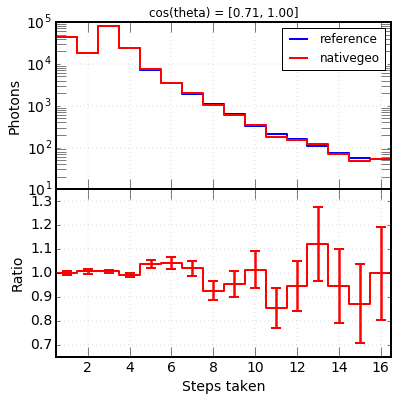

In [48]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference, native],
                               costheta_range = costheta_range  ,
                                pltlabels=['reference','nativegeo'],
                               outdir=outdir)


[ 0.9993063   1.01107003  1.0200858   1.00365519]
[ 1.01048213  0.99883804  0.99955615  0.99780248  1.02159305  1.01384643
  1.00688916  1.0145379   0.99482536  0.99077734  1.06772908  0.94705882
  1.07023411  1.02970297  1.14754098  0.95488722]


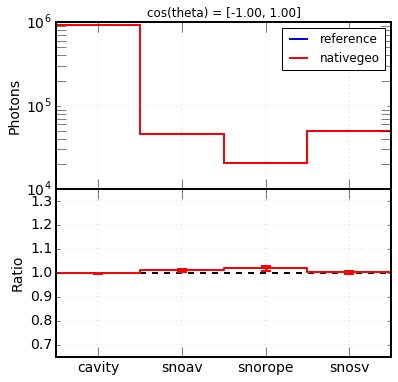

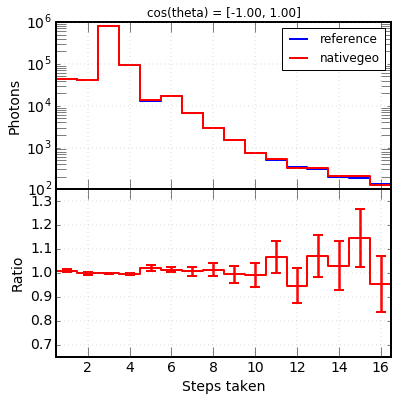

In [26]:
outdir = '/home/jp/projects/snoplus/reports/nativegeometry/newfigs/500nm'
geo_studies.compareTracking(set_list = [reference500, native500],
                                                       pltlabels=['reference','nativegeo'],
                           outdir=outdir)

[ 0.99933494  0.93933313  1.06521739  0.99704309]
[ 1.00526484  0.9986847   0.9959722   0.98887859  0.94574037  0.93945237
  1.32692308  1.31007752  1.10280374  0.74576271  0.8630137   1.26315789
  0.90909091  1.24        1.18181818  0.84615385]
[ 0.99485341  0.93524852  1.00412371  0.98840826]
[ 0.99328752  0.97613843  0.99150947  0.9972029   0.98866091  0.90588235
  1.20405728  1.13276836  1.04186047  1.38823529  1.16666667  1.
  0.88095238  1.48        1.09090909  1.        ]
[ 1.01014721  1.02300914  1.04413793  1.00819554]
[ 1.02159333  1.02017726  1.00928611  0.99568035  1.05432937  1.0362069
  1.09142857  1.08287293  1.21025641  1.03030303  1.09836066  0.97916667
  1.04878049  1.19047619  1.22727273  0.88888889]
[ 1.00069175  0.99660086  0.9700281   1.04254088]
[ 1.05177781  1.01547011  0.99825804  1.01934592  0.99389958  0.97753268
  0.9332146   0.99224806  0.94366197  0.94186047  1.11711712  0.78082192
  1.39583333  0.76744186  1.04651163  1.12903226]
[ 0.99654701  1.02315651 

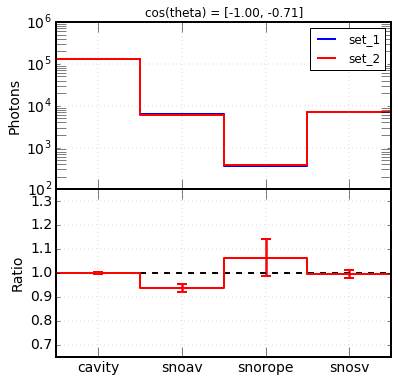

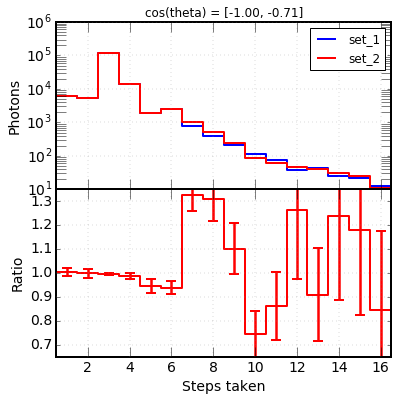

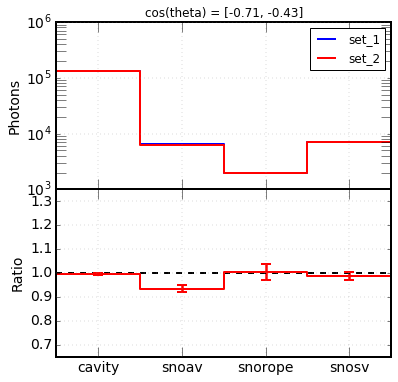

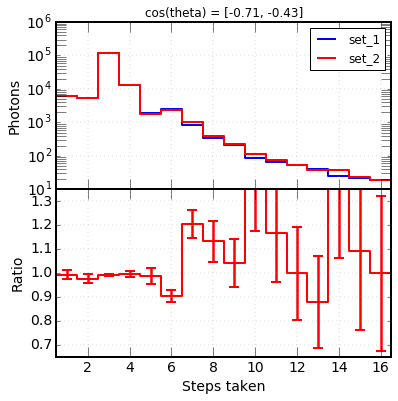

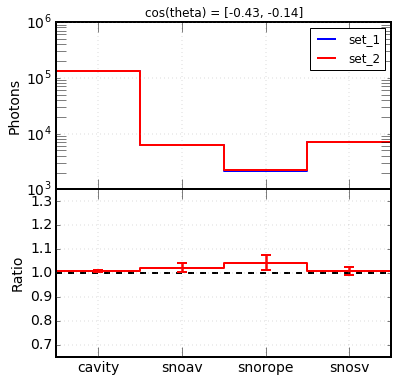

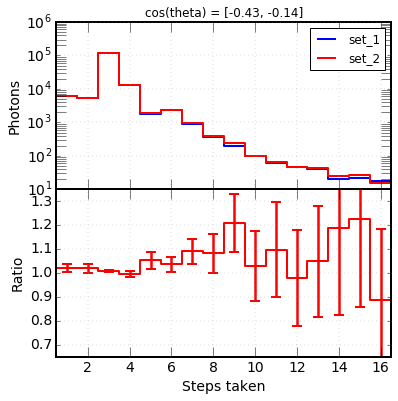

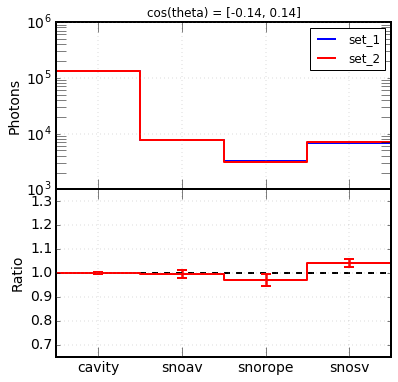

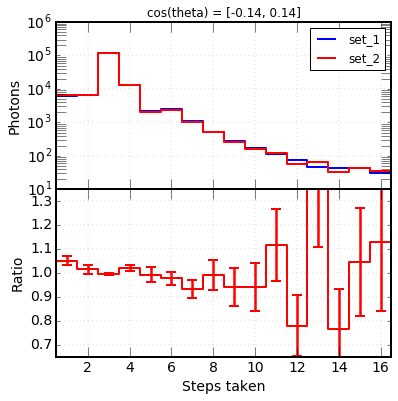

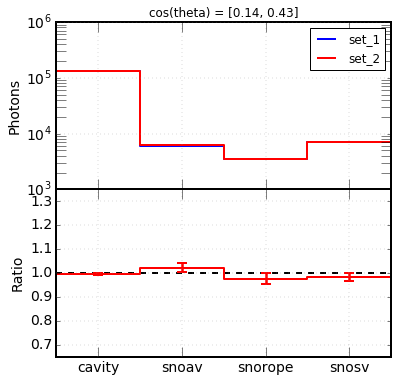

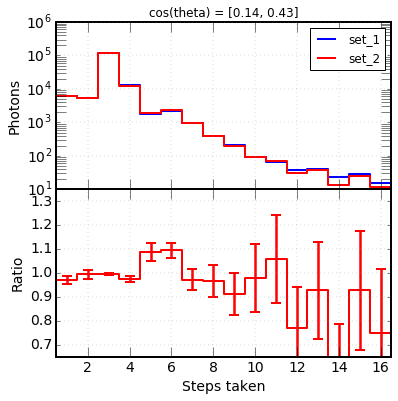

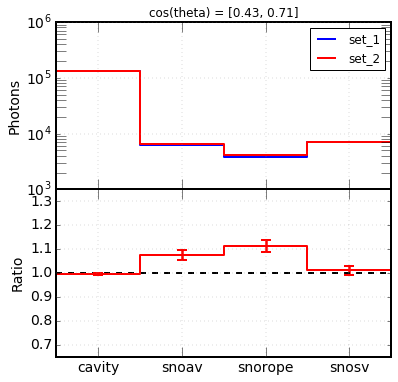

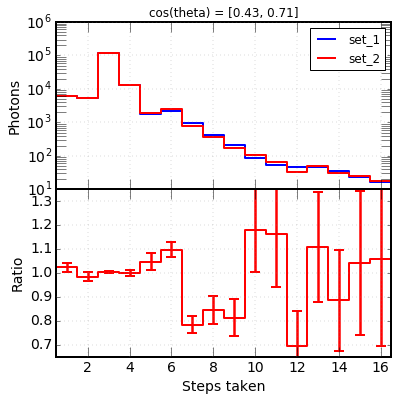

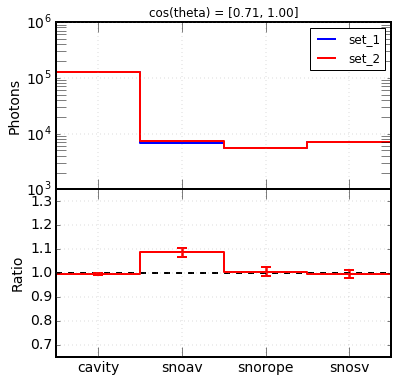

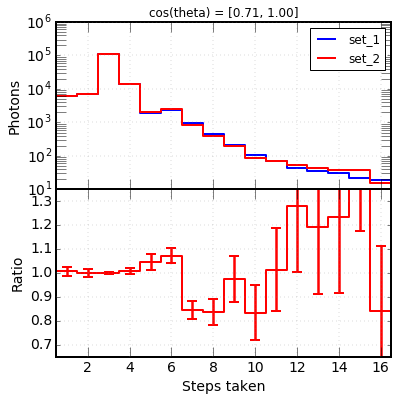

In [27]:
cosz_list = np.linspace(-1, 1, 8)
for i in range(len(cosz_list)-1):
    costheta_range = [cosz_list[i],cosz_list[i+1]]
    #print '\nRange ', costheta_range
    geo_studies.compareTracking(set_list = [reference500, native500],
                               costheta_range = costheta_range)
